**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopzs)** or **[LinkedIn](https://linkedin.com/in/jsulopzs)**

# #01 | Machine Learning & Linear Regression

## Chapter Importance

Machine Learning is all about calculating [the best numbers](https://twitter.com/sotastica/status/1449735653328031745) of a mathematical equation by [minimizing the distance between real data and predictions](https://www.youtube.com/watch?v=Ht3rYS-JilE).

The form of a Linear Regression mathematical equation is as follows:

$$
y = (a) + (b) \cdot x
$$

As we see in the following plot, **not any mathematical equation is valid**; the red line doesn't fit the real data (blue points) as well as the green one.

<center>
<img src="src/linear-regression.jpeg" width="400" align="center">
</center>

How do we understand the development of Machine Learning models in Python **to predict what may happen in the future**?

This tutorial covers the topics described below using **USA Car Crashes data** to predict the accidents based on alcohol.

1. Step by step procedure to compute a Linear Regression:
    1. `.fit()` the numbers of the mathematical equation
    2. `.predict()` the future with the mathematical equation
    3. `.score()` how good is the mathematical equation
2. How to **visualize** the Linear Regression model?
3. How to **evaluate** Regression models step by step?
    - Residuals Sum of Squares
    - Total Sum of Squares
    - R Squared Ratio $R^2$
4. How to **interpret** the coeficients of the Linear Regression?
5. Compare the Linear Regression to other Machine Learning models such as:
    - Random Forest
    - Support Vector Machines
6. Why **we don't need to know the maths** behind every model to apply Machine Learning in Python?

## [ ] Load the Data

- This dataset contains **statistics about Car Accidents** (columns)
- In each one of **USA States** (rows)

Visit [this website](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/) if you want to know the measures of the columns.

In [1]:
import seaborn as sns #!

df_crashes = sns.load_dataset(name='car_crashes', index_col='abbrev')[['alcohol', 'total']]
df_crashes.rename({'total': 'accidents'}, axis=1, inplace=True)
df_crashes

,alcohol,accidents
abbrev,,
AL,5.640,18.8
AK,4.525,18.1
AZ,5.208,18.6
AR,5.824,22.4
CA,3.360,12.0
CO,3.808,13.6
CT,3.888,10.8
DE,4.860,16.2
DC,1.593,5.9


## How do we compute a `LinearRegression` Model in Python?

### Import the Class

In [2]:
from sklearn.linear_model import LinearRegression

### Instantiate the Class

In [3]:
model_lr = LinearRegression()

### Fit the Model

In [4]:
model_lr.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

### Separate the Variables

In [5]:
target= df_crashes[['accidents']]
features=df_crashes['alcohol']

### Fit the Model Again

In [6]:
model_lr.fit(X=target ,y=features)

LinearRegression()

### [ ] Predictions

#### Calculate the Predictions

In [7]:
model_lr.predict(X=target)

array([5.96327536, 5.7129123 , 5.89174306, 7.25085684, 3.53117702,
       4.10343545, 3.10198319, 5.03335541, 1.34944174, 5.64137999,
       4.81875849, 5.49831539, 4.71146004, 3.81730624, 4.42533082,
       4.85452465, 5.60561384, 6.89319532, 6.57129995, 4.63992773,
       3.71000778, 2.17206324, 4.28226621, 2.67278937, 5.53408154,
       4.99758926, 6.89319532, 4.56839543, 4.49686313, 3.38811241,
       3.2450478 , 5.82021075, 3.63847547, 5.24795232, 7.78734912,
       4.28226621, 6.35670304, 3.81730624, 5.74867845, 3.20928165,
       7.78734912, 6.17787228, 6.21363843, 6.17787228, 3.28081395,
       4.10343545, 3.78154008, 3.03045089, 7.75158297, 4.17496776,
       5.46254923])

#### Add a New Column with the Predictions

In [8]:
df_crashes['predict']= model_lr.predict(X=target)
df_crashes

,alcohol,accidents,predict
abbrev,,,
AL,5.640,18.8,5.963275
AK,4.525,18.1,5.712912
AZ,5.208,18.6,5.891743
AR,5.824,22.4,7.250857
CA,3.360,12.0,3.531177
CO,3.808,13.6,4.103435
CT,3.888,10.8,3.101983
DE,4.860,16.2,5.033355
DC,1.593,5.9,1.349442


### Model Visualization

In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='alcohol', ylabel='accidents'>

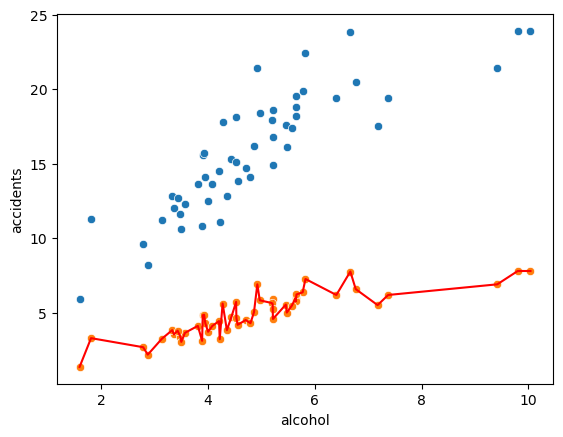

In [10]:
sns.scatterplot(x='alcohol',y='accidents',data=df_crashes)
sns.scatterplot(x='alcohol',y ='predict',data=df_crashes);
sns.lineplot(x='alcohol',y='predict',data=df_crashes, color ='red')

### [ ] Model's Score

#### Calculate the Score

In [11]:
model_lr.score(X=target, y=features)

0.7269492966665407

#### Explain the Score

##### Residuals

###  the difference between reality and prediction

In [12]:
df1 =df_crashes['accidents'] - df_crashes['predict']
df1

abbrev
AL    12.836725
AK    12.387088
AZ    12.708257
AR    15.149143
CA     8.468823
CO     9.496565
CT     7.698017
DE    11.166645
DC     4.550558
FL    12.258620
GA    10.781242
HI    12.001685
ID    10.588540
IL     8.982694
IN    10.074669
IA    10.845475
KS    12.194386
KY    14.506805
LA    13.928700
ME    10.460072
MD     8.789992
MA     6.027937
MI     9.817734
MN     6.927211
MS    12.065918
MO    11.102411
MT    14.506805
NE    10.331605
NV    10.203137
NH     8.211888
NJ     7.954952
NM    12.579789
NY     8.661525
NC    11.552048
ND    16.112651
OH     9.817734
OK    13.543297
OR     8.982694
PA    12.451322
RI     7.890718
SC    16.112651
SD    13.222128
TN    13.286362
TX    13.222128
UT     8.019186
VT     9.496565
VA     8.918460
WA     7.569549
WV    16.048417
WI     9.625032
WY    11.937451
dtype: float64

In [13]:
df_crashes['residual'] =df1

In [14]:
df_crashes

,alcohol,accidents,predict,residual
abbrev,,,,
AL,5.640,18.8,5.963275,12.836725
AK,4.525,18.1,5.712912,12.387088
AZ,5.208,18.6,5.891743,12.708257
AR,5.824,22.4,7.250857,15.149143
CA,3.360,12.0,3.531177,8.468823
CO,3.808,13.6,4.103435,9.496565
CT,3.888,10.8,3.101983,7.698017
DE,4.860,16.2,5.033355,11.166645
DC,1.593,5.9,1.349442,4.550558


In [15]:
df_crashes['residual'].sum()

556.0739999999998

In [16]:
df_crashes.residual.sum().round(2)

556.07

##### Target's Variation

In [17]:
RSS =df_crashes.residual.sum()

### accidents - the accident mean[target-mean trarget or x - mean of x]

In [18]:
df_crashes.accidents

abbrev
AL    18.8
AK    18.1
AZ    18.6
AR    22.4
CA    12.0
CO    13.6
CT    10.8
DE    16.2
DC     5.9
FL    17.9
GA    15.6
HI    17.5
ID    15.3
IL    12.8
IN    14.5
IA    15.7
KS    17.8
KY    21.4
LA    20.5
ME    15.1
MD    12.5
MA     8.2
MI    14.1
MN     9.6
MS    17.6
MO    16.1
MT    21.4
NE    14.9
NV    14.7
NH    11.6
NJ    11.2
NM    18.4
NY    12.3
NC    16.8
ND    23.9
OH    14.1
OK    19.9
OR    12.8
PA    18.2
RI    11.1
SC    23.9
SD    19.4
TN    19.5
TX    19.4
UT    11.3
VT    13.6
VA    12.7
WA    10.6
WV    23.8
WI    13.8
WY    17.4
Name: accidents, dtype: float64

In [19]:
df_crashes.accidents.mean()

15.79019607843137

In [20]:
df_residual = df_crashes.accidents - df_crashes.accidents.mean()
df_residual

abbrev
AL    3.009804
AK    2.309804
AZ    2.809804
AR    6.609804
CA   -3.790196
CO   -2.190196
CT   -4.990196
DE    0.409804
DC   -9.890196
FL    2.109804
GA   -0.190196
HI    1.709804
ID   -0.490196
IL   -2.990196
IN   -1.290196
IA   -0.090196
KS    2.009804
KY    5.609804
LA    4.709804
ME   -0.690196
MD   -3.290196
MA   -7.590196
MI   -1.690196
MN   -6.190196
MS    1.809804
MO    0.309804
MT    5.609804
NE   -0.890196
NV   -1.090196
NH   -4.190196
NJ   -4.590196
NM    2.609804
NY   -3.490196
NC    1.009804
ND    8.109804
OH   -1.690196
OK    4.109804
OR   -2.990196
PA    2.409804
RI   -4.690196
SC    8.109804
SD    3.609804
TN    3.709804
TX    3.609804
UT   -4.490196
VT   -2.190196
VA   -3.090196
WA   -5.190196
WV    8.009804
WI   -1.990196
WY    1.609804
Name: accidents, dtype: float64

In [21]:
df_crashes['df_residual'] = df_residual

In [22]:
df_crashes['df_residual^2'] = df_crashes.df_residual**2

In [23]:
TSS = df_crashes['df_residual^2'].sum()
TSS

849.5450980392156

##### The Ratio

In [24]:
RSS/TSS

0.6545550098322515

In [25]:
1-RSS/TSS

0.34544499016774854

### [ ] Model Interpretation

In [26]:
model_lr.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accidents'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.35766152]),
 'rank_': 1,
 'singular_': array([29.14695693]),
 'intercept_': -0.7607612369249521}

In [48]:
model_lr.intercept_

-0.7607612369249521

In [49]:
model_lr.coef_

array([0.35766152])

### accidents = (((a) + (b))*) where a = intercept and b = coef

## [ ] Other Regression Models

### `RandomForestRegressor()` in Python

In [28]:
from sklearn.ensemble import RandomForestRegressor

#### Fit the Model

In [29]:
model_r = RandomForestRegressor()

In [30]:
model_r.fit(X=target, y=features)

RandomForestRegressor()

#### Calculate Predictions

In [31]:
model_r.predict(X=target)

array([5.4964    , 4.80366   , 5.26542   , 6.353815  , 3.39069   ,
       4.021321  , 3.77268   , 4.86179   , 2.12225   , 4.8793    ,
       4.01219   , 6.5112    , 4.43107   , 3.85320733, 4.377112  ,
       4.04007   , 4.70051   , 7.217635  , 6.550115  , 4.5477    ,
       3.85644   , 2.69849   , 4.410073  , 3.1538    , 5.73441   ,
       5.11967   , 7.217635  , 4.96229   , 4.642795  , 2.97068   ,
       3.24598   , 5.11855   , 3.63555   , 5.22841   , 9.53238217,
       4.410073  , 5.86449833, 3.85320733, 5.25494   , 3.74388   ,
       9.53238217, 6.7309    , 6.04075667, 6.7309    , 2.37492   ,
       4.021321  , 3.584264  , 3.63702   , 7.613462  , 4.289473  ,
       5.82019   ])

#### Model's Score

In [32]:
model_r.score(X=target, y=features)

0.8924918077659212

### `SVR()` in Python

In [33]:
from sklearn.svm import SVR

#### Fit the Model

In [34]:
model_svr = SVR()

In [35]:
model_svr.fit(X=target, y= features)

SVR()

#### Calculate Predictions

In [36]:
model_svr.predict(X=target)

array([5.61562686, 5.45323618, 5.5698944 , 6.45135056, 3.5486806 ,
       3.98918448, 3.31596057, 4.91783593, 3.09553549, 5.40487557,
       4.70946904, 5.30369916, 4.60034423, 3.7471614 , 4.30452767,
       4.74524027, 5.38018775, 6.23930673, 6.01725246, 4.52654253,
       3.66774311, 2.97047848, 4.16016954, 3.12749748, 5.32963027,
       4.88425886, 6.23930673, 4.4523608 , 4.37821526, 3.46403276,
       3.38703119, 5.52377507, 3.6181973 , 5.10777991, 6.56070953,
       4.16016954, 5.87077996, 3.7471614 , 5.47697961, 3.36877041,
       6.56070953, 5.75309166, 5.77632112, 5.75309166, 3.40566113,
       3.98918448, 3.71999578, 3.282188  , 6.5644341 , 4.05603036,
       5.27729581])

#### Model's Score

In [37]:
model_svr.score(X=target, y=features)

0.6343688815099963

## Which One Is the Best? Why?

## [ ] Visualize the 3 Models

###  with prediction regression model

In [38]:
df_crashes['predict2']= model_r.predict(X=target)
df_crashes

,alcohol,accidents,predict,residual,df_residual,df_residual^2,predict2
abbrev,,,,,,,
AL,5.640,18.8,5.963275,12.836725,3.009804,9.058920,5.496400
AK,4.525,18.1,5.712912,12.387088,2.309804,5.335194,4.803660
AZ,5.208,18.6,5.891743,12.708257,2.809804,7.894998,5.265420
AR,5.824,22.4,7.250857,15.149143,6.609804,43.689508,6.353815
CA,3.360,12.0,3.531177,8.468823,-3.790196,14.365586,3.390690
CO,3.808,13.6,4.103435,9.496565,-2.190196,4.796959,4.021321
CT,3.888,10.8,3.101983,7.698017,-4.990196,24.902057,3.772680
DE,4.860,16.2,5.033355,11.166645,0.409804,0.167939,4.861790
DC,1.593,5.9,1.349442,4.550558,-9.890196,97.815978,2.122250


<AxesSubplot:xlabel='alcohol', ylabel='accidents'>

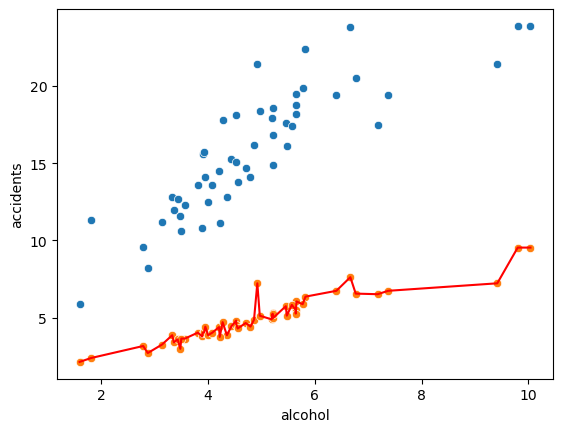

In [39]:
sns.scatterplot(x='alcohol',y='accidents',data=df_crashes)
sns.scatterplot(x='alcohol',y ='predict2',data=df_crashes)
sns.lineplot(x='alcohol',y='predict2',data=df_crashes, color ='red')

In [40]:
df_crashes['predict3']= model_svr.predict(X=target)
df_crashes

,alcohol,accidents,predict,residual,df_residual,df_residual^2,predict2,predict3
abbrev,,,,,,,,
AL,5.640,18.8,5.963275,12.836725,3.009804,9.058920,5.496400,5.615627
AK,4.525,18.1,5.712912,12.387088,2.309804,5.335194,4.803660,5.453236
AZ,5.208,18.6,5.891743,12.708257,2.809804,7.894998,5.265420,5.569894
AR,5.824,22.4,7.250857,15.149143,6.609804,43.689508,6.353815,6.451351
CA,3.360,12.0,3.531177,8.468823,-3.790196,14.365586,3.390690,3.548681
CO,3.808,13.6,4.103435,9.496565,-2.190196,4.796959,4.021321,3.989184
CT,3.888,10.8,3.101983,7.698017,-4.990196,24.902057,3.772680,3.315961
DE,4.860,16.2,5.033355,11.166645,0.409804,0.167939,4.861790,4.917836
DC,1.593,5.9,1.349442,4.550558,-9.890196,97.815978,2.122250,3.095535


<AxesSubplot:xlabel='alcohol', ylabel='accidents'>

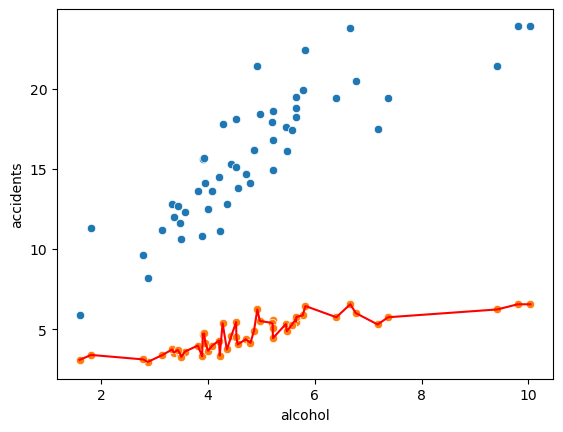

In [41]:
sns.scatterplot(x='alcohol',y='accidents',data=df_crashes)
sns.scatterplot(x='alcohol',y='predict3',data=df_crashes)
sns.lineplot(x='alcohol',y='predict3',data=df_crashes, color ='red')

<AxesSubplot:xlabel='alcohol', ylabel='accidents'>

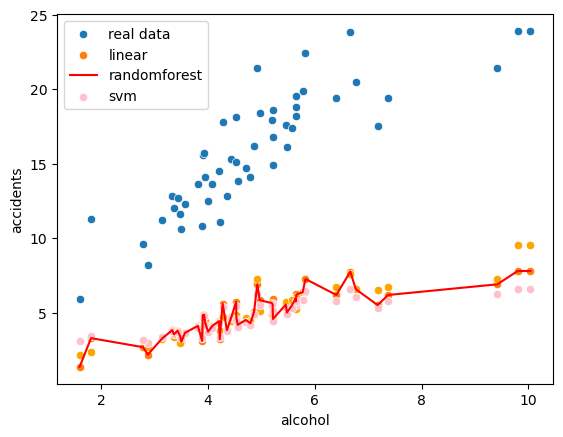

In [42]:
sns.scatterplot(x='alcohol',y='accidents',data=df_crashes, label = 'real data')
sns.scatterplot(x='alcohol',y ='predict',data=df_crashes, label= 'linear')
sns.lineplot(x='alcohol',y='predict',data=df_crashes, color ='red',label = 'randomforest')
sns.scatterplot(x='alcohol',y='predict2',data=df_crashes, color ='orange')
sns.scatterplot(x='alcohol',y='predict3',data=df_crashes, color ='pink', label= 'svm')

In [43]:

import pandas as pd

In [44]:
df2 = pd.DataFrame()

In [45]:
df2 ['models']= [model_lr, model_r,model_svr]

In [46]:
df2 ['score']= [model_lr.score(X=target , y=features), model_r.score(X=target,y=features), model_svr.score(X=target,y=features)]

In [47]:
df2

,models,score
0,LinearRegression(),0.726949
1,"(DecisionTreeRegressor(max_features=1.0, rando...",0.892492
2,SVR(),0.634369


#### random forest is the best mode

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.